In [74]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score


In [75]:
file = 'kc_house_data.csv'

In [76]:
df = pd.read_csv('kc_house_data.csv')

In [77]:
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [78]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             21613 non-null  int64  
 1   date           21613 non-null  object 
 2   price          21613 non-null  float64
 3   bedrooms       21613 non-null  int64  
 4   bathrooms      21613 non-null  float64
 5   sqft_living    21613 non-null  int64  
 6   sqft_lot       21613 non-null  int64  
 7   floors         21613 non-null  float64
 8   waterfront     21613 non-null  int64  
 9   view           21613 non-null  int64  
 10  condition      21613 non-null  int64  
 11  grade          21613 non-null  int64  
 12  sqft_above     21613 non-null  int64  
 13  sqft_basement  21613 non-null  int64  
 14  yr_built       21613 non-null  int64  
 15  yr_renovated   21613 non-null  int64  
 16  zipcode        21613 non-null  int64  
 17  lat            21613 non-null  float64
 18  long  

In [79]:
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,5.400881e+05,3.370842,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876566e+09,3.671272e+05,0.930062,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


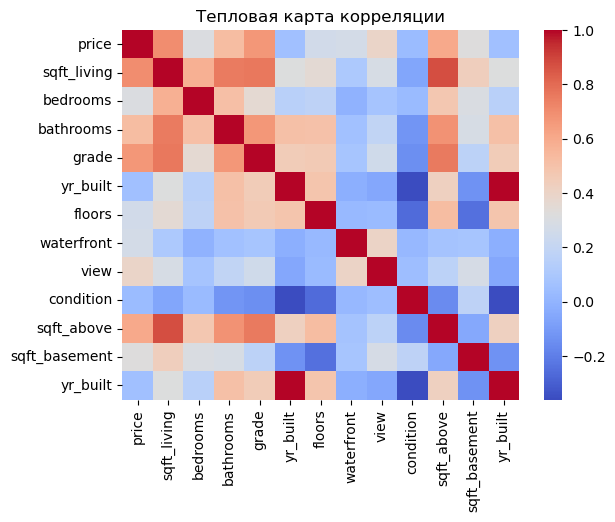

In [80]:
cols_for_corr = ['price', 'sqft_living', 'bedrooms', 'bathrooms', 'grade', 'yr_built','floors','waterfront','view','condition','sqft_above','sqft_basement','yr_built']
correlation_matrix = df[cols_for_corr].corr()
sns.heatmap(correlation_matrix, annot=False, cmap='coolwarm', fmt=".2f")
plt.title('Тепловая карта корреляции')
plt.show()

In [81]:
X = df[['sqft_living']].values
y = df['price'].values

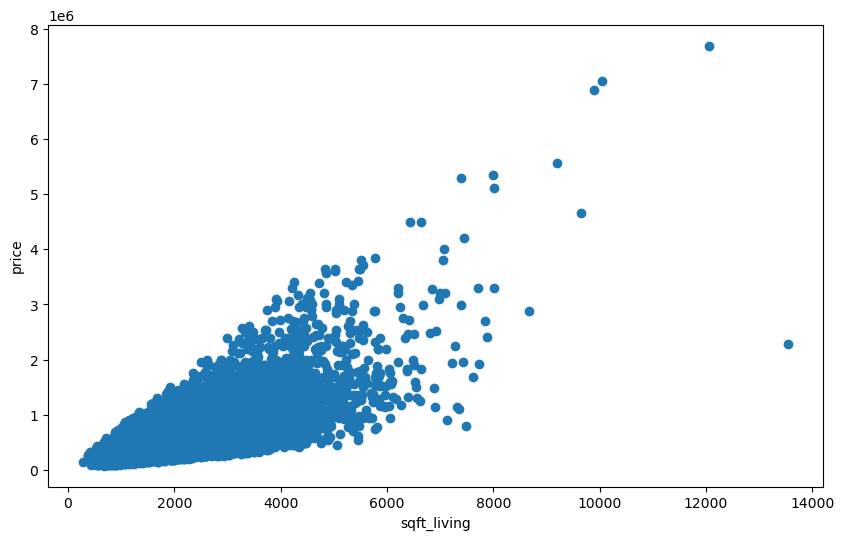

In [82]:
fig = plt.figure(figsize=(10,6))
plt.scatter(X,y)
plt.xlabel('sqft_living')
plt.ylabel('price')
plt.show()

In [83]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [84]:
sc_X = StandardScaler()
X_train_sc = sc_X.fit_transform(X_train) 
X_test_sc = sc_X.transform(X_test) 
print(X_train_sc)
print(X_test_sc)

[[-0.32393262]
 [-1.18365301]
 [-1.09547656]
 ...
 [ 0.05081729]
 [-1.8670205 ]
 [ 1.16404497]]
[[-0.00429299]
 [ 0.91053768]
 [ 1.86945657]
 ...
 [ 0.39690986]
 [ 0.19410402]
 [ 0.54680982]]


In [85]:
sc_y = StandardScaler()
y_train_sc = sc_y.fit_transform(y_train.reshape(-1, 1)).flatten()
y_test_sc = sc_y.transform(y_test.reshape(-1, 1)).flatten()
print(y_train_sc)
print(y_test_sc)

[-0.58864574 -0.77677507 -0.85562339 ...  0.10300621 -0.80997436
 -0.61631182]
[-0.47798143  0.90532247  1.38394562 ... -0.69931005  0.18600444
 -0.5014976 ]


In [86]:
def predict(X, W, b):
    return X.flatten() * W + b

In [87]:
def train(X_train, y_train, learning_rate=0.01, iterations=1000):
    n = len(X_train)  
    W = 0.0 
    b = 0.0 
    for _ in range(iterations):
        y_pred = predict(X_train, W, b)                                    
        dW = (1/n) * np.sum(X_train.flatten() * (y_pred - y_train))
        db = (1/n) * np.sum(y_pred - y_train)
        W -= learning_rate * dW
        b -= learning_rate * db
    return W, b 

In [88]:
W_optimal, b_optimal = train(
    X_train_sc, 
    y_train_sc, 
    learning_rate=0.01, 
    iterations=2000
)
print(f"Вес(W): {W_optimal:.4f}")
print(f"Смещение(b): {b_optimal:.4f}")

Вес(W): 0.7017
Смещение(b): 0.0000


In [89]:
y_pred_optimal_sc = predict(X_test_sc, W_optimal, b_optimal)
y_pred_optimal = sc_y.inverse_transform(y_pred_optimal_sc.reshape(-1, 1)).flatten()
print(y_pred_optimal_sc)
print(y_pred_optimal)

[-0.0030124   0.6389249   1.31179894 ...  0.27851191  0.13620292
  0.38369682]
[ 536679.20714469  768709.67354391 1011922.3310949  ...  638437.14662579
  586999.06732765  676456.59654181]


In [90]:
from sklearn.linear_model import LinearRegression

In [91]:
test_model = LinearRegression() 
test_model.fit(X_train, y_train) 
y_pred_test = test_model.predict(X_test)
print(f"Вес(W): {test_model.coef_[0]:.4f}, Смещение(b): {test_model.intercept_:.4f}")


Вес(W): 279.5548, Смещение(b): -41999.1860


In [92]:
def result (y_true, y_pred, model_name):
    mse = mean_squared_error(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)  
    print(f"MSE: {mse:.2f}")
    print(f"MAE: {mae:.2f}")
    print(f"R-квадрат: {r2:.4f}")


In [93]:
result(y_test, y_pred_optimal, "No Box")

MSE: 76484977066.49
MAE: 177867.54
R-квадрат: 0.4941


In [94]:
result(y_test, y_pred_test, "Box")

MSE: 76484977061.78
MAE: 177867.54
R-квадрат: 0.4941
